In [1]:
import pandas as pd
wrldmtr_df = pd.read_excel('worldometer.xlsx')

In [2]:
wrldmtr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
country                      80 non-null object
total cases                  80 non-null int64
new cases                    79 non-null float64
total deaths                 80 non-null int64
new deaths                   63 non-null float64
total recovered              80 non-null int64
active cases                 80 non-null int64
serious, critical            71 non-null float64
case per pop                 80 non-null int64
death per pop                80 non-null float64
total tests                  75 non-null float64
tests/1M pop                 75 non-null float64
population                   80 non-null int64
median age                   80 non-null float64
crude mortality rate         80 non-null float64
population density(km)       80 non-null float64
population density(miles)    80 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 10.8+ KB


In [3]:
wrldmtr_df.head()

,country,total cases,new cases,total deaths,new deaths,total recovered,active cases,"serious, critical",case per pop,death per pop,total tests,tests/1M pop,population,median age,crude mortality rate,population density(km),population density(miles)
0,Afghanistan,25527,761.0,478,7.0,5164,19885,19.0,656,12.0,57532.0,1480.0,330922877,38.3,8.472173,59.6850,154.5841
1,Algeria,11031,112.0,777,10.0,7735,2519,39.0,252,18.0,NaN,NaN,212496348,33.5,9.128289,18.4113,47.6854
2,Argentina,32785,1208.0,854,21.0,9891,22040,274.0,726,19.0,239941.0,5311.0,145932063,39.6,7.947883,16.2551,42.1008
3,Armenia,17064,397.0,285,16.0,6276,10503,10.0,5759,96.0,83600.0,28214.0,1379418901,28.2,4.343850,99.6282,258.0372
4,Australia,7335,15.0,102,NaN,6851,382,4.0,288,4.0,1830665.0,71828.0,60465149,47.9,1.466993,3.3151,8.5861


data cleaning

In [4]:
wrldmtr_df['country'] = wrldmtr_df['country'].str.lower()
wrldmtr_df = wrldmtr_df.fillna(0)
wrldmtr_df

,country,total cases,new cases,total deaths,new deaths,total recovered,active cases,"serious, critical",case per pop,death per pop,total tests,tests/1M pop,population,median age,crude mortality rate,population density(km),population density(miles)
0,afghanistan,25527,761.0,478,7.0,5164,19885,19.0,656,12.0,57532.0,1480.0,330922877,38.3,8.472173,59.6850,154.5841
1,algeria,11031,112.0,777,10.0,7735,2519,39.0,252,18.0,0.0,0.0,212496348,33.5,9.128289,18.4113,47.6854
2,argentina,32785,1208.0,854,21.0,9891,22040,274.0,726,19.0,239941.0,5311.0,145932063,39.6,7.947883,16.2551,42.1008
3,armenia,17064,397.0,285,16.0,6276,10503,10.0,5759,96.0,83600.0,28214.0,1379418901,28.2,4.343850,99.6282,258.0372
4,australia,7335,15.0,102,0.0,6851,382,4.0,288,4.0,1830665.0,71828.0,60465149,47.9,1.466993,3.3151,8.5861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,turkey,179831,1592.0,4825,18.0,152364,22642,722.0,2133,57.0,2674203.0,31723.0,2083377,37.4,3.069553,107.6355,278.7759
76,uae,42636,342.0,291,2.0,28129,14216,1.0,4313,29.0,2626000.0,265652.0,9661255,41.7,1.023927,118.3062,306.4132
77,ukraine,31810,656.0,901,12.0,14253,16656,314.0,727,21.0,497284.0,11368.0,625504,39.3,5.945625,72.4669,187.6892
78,usa,2182911,20683.0,118282,424.0,881120,1183509,16716.0,6596,357.0,25241128.0,76275.0,2223082,20.5,11.835277,35.3160,91.4683


In [5]:
import scipy.stats

IDENTIFYING DIFFERENT CORRELATION MODELS

In [6]:
cases = wrldmtr_df['total cases']
no_deaths = wrldmtr_df['total deaths']


PEARSON

In [7]:
scipy.stats.pearsonr(cases, no_deaths)[0]

0.9465165168521094

SPEARMAN

In [8]:
scipy.stats.spearmanr(cases, no_deaths)[0]

0.807918610597283

KENDALLS

In [9]:
scipy.stats.kendalltau(cases, no_deaths)[0]

0.6415454104808711

OLS LINEAR REGRESSION

In [10]:
scipy.stats.linregress(cases, no_deaths)

LinregressResult(slope=0.05218844609903868, intercept=-326.3512391615868, rvalue=0.9465165168521092, pvalue=4.5643326337154725e-40, stderr=0.002014363094347323)

In [11]:
cases.corr(no_deaths)

0.9465165168521092

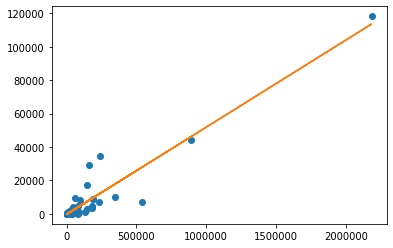

In [28]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(cases, no_deaths, 'o')

m, b = np.polyfit(cases, no_deaths, 1)

plt.plot(cases, m*cases + b)

DIFF MODELS ON MED AGE WITH CRUDE MORTALITY RATE

In [13]:
med_age = wrldmtr_df['median age']
mort_rate = wrldmtr_df['crude mortality rate']
scipy.stats.pearsonr(med_age, mort_rate)[0]

-0.03137747335576445

In [14]:
scipy.stats.spearmanr(med_age, mort_rate)[0]

-0.016270073960096755

In [15]:
scipy.stats.kendalltau(med_age, mort_rate)[0]

-0.0066613987088634165

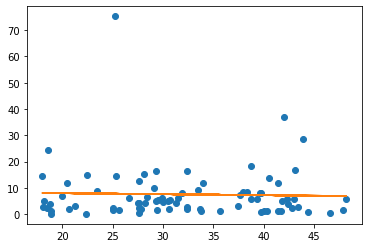

In [16]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(med_age, mort_rate, 'o')

m, b = np.polyfit(med_age, mort_rate, 1)

plt.plot(med_age, m*med_age + b)

CORRELATION MODELS OF MORTALITY RATE WITH POPULATION DENSITY

In [17]:

pop_dns = wrldmtr_df['population density(km)']
scipy.stats.pearsonr(mort_rate, pop_dns)[0]

-0.06872055003149705

In [18]:
scipy.stats.spearmanr(mort_rate, pop_dns)[0]

0.014416315049226441

In [19]:
scipy.stats.kendalltau(mort_rate, pop_dns)[0]

0.010126582278481011

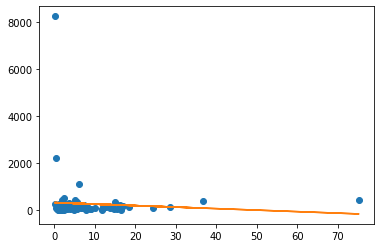

In [20]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(mort_rate, pop_dns, 'o')

m, b = np.polyfit(mort_rate, pop_dns, 1)

plt.plot(mort_rate, m*mort_rate + b)

CORRELATION OF POPULATION DENSITY USING CASES PER 1MILLION POPULATION AND DEATH PER 1M POPULATION

In [21]:
cas_pop = wrldmtr_df['case per pop']
mort_pop = wrldmtr_df['death per pop']

In [22]:
scipy.stats.pearsonr(cas_pop, mort_pop)[0]

0.23343747744837118

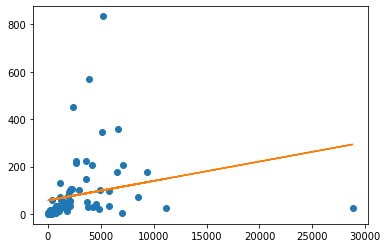

In [23]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(cas_pop, mort_pop, 'o')

m, b = np.polyfit(cas_pop, mort_pop, 1)

plt.plot(cas_pop, m*cas_pop + b)

In [24]:
tot_cas = wrldmtr_df['total cases']
scipy.stats.pearsonr(pop_dns, tot_cas)[0]

-0.040645281653849855

In [25]:
mul_r = pd.DataFrame()
mul_r['pop_dns'] = wrldmtr_df['population density(km)']
mul_r['med_age'] = wrldmtr_df['median age']
mul_r

,pop_dns,med_age
0,59.6850,38.3
1,18.4113,33.5
2,16.2551,39.6
3,99.6282,28.2
4,3.3151,47.9
...,...,...
75,107.6355,37.4
76,118.3062,41.7
77,72.4669,39.3
78,35.3160,20.5


# MULTI CORRELATION MODEL

WORLDOMETER DATA - CORRELATION OF MORTALITY RATE WITH MEDIAN AGE AND POPULATION DENSITY

In [26]:
from statsmodels.api import OLS
model = OLS(mort_rate, mul_r)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     crude mortality rate   R-squared (uncentered):                   0.328
Model:                              OLS   Adj. R-squared (uncentered):              0.311
Method:                   Least Squares   F-statistic:                              19.03
Date:                  Tue, 23 Jun 2020   Prob (F-statistic):                    1.85e-07
Time:                          11:12:03   Log-Likelihood:                         -300.15
No. Observations:                    80   AIC:                                      604.3
Df Residuals:                        78   BIC:                                      609.1
Df Model:                             2                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop_dns       -0.0004      0.001     -0.325      0.746      -0.003       0.002
med_age        0.2197      0.036      6.060      0.000       0.148       0.292
==============================================================================
Omnibus:                      105.589   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2115.288
Skew:                           4.173   Prob(JB):                         0.00
Kurtosis:                      26.769   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

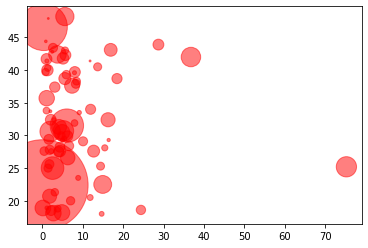

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(mort_rate,mul_r['med_age'],mul_r['pop_dns'],c='red', marker='o', alpha=0.5)
plt.show()